# Business Analysis with EDA & Statistics
#### By Darren Gidado

In [1]:
from PIL import Image # Library for importing images
Image.open('images/title.jpg')

## Table of Contents 📋
- [Introduction](#intro)
- [Section 1: Exploratory Data Analysis](#section01)
- [Section 2: Statistical Analysis](#section02)
- [Section 3: Data Visualization](#section03)
- [Section 4: CMO Recommendations](#section04)

<a id='intro'></a>
## Introduction 👋
You're a marketing analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set to understand this problem and propose data-driven solutions. 

#### Section 1: Exploratory Data Analysis
- Are there any null values or outliers? How will you wrangle/handle them?
- Are there any variables that warrant transformations?
- Are there any useful variables that you can engineer with the given data?
- Do you notice any patterns or anomalies in the data? Can you plot them?

#### Section 2: Statistical Analysis
- What factors are significantly related to the number of store purchases?
- Does US fare significantly better than the Rest of the World in terms of total purchases?
- Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test
- Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish? (Hint: use your knowledge of interaction variables/effects)
- Is there a significant relationship between geographical regional and success of a campaign?

#### Section 3: Data Visualization
- What does the average customer look like for this company?
- Which products are performing best?
- Which channels are underperforming?

#### Section 4: CMO Recommendations
Bring together everything from Sections 01 to 03 and provide data-driven recommendations/suggestions to your CMO.

#### Source: https://www.kaggle.com/jackdaoud/marketing-data

<a id='section01'></a>
### Section 1: Exploratory Data Analysis 🔎

- Are there any null values or outliers? If so, how will we wrangle/handle them?
- Are there any variables that warrant transformations?
- Are there any useful variables that we can engineer with the given data?
- Notice any patterns or anomalies in the data? Can we plot them?

#### Data Wrangling

In [2]:
# Importing libaries
import pandas as pd
import numpy as np
import datetime as dt
import markdown
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import missingno as msno 
%matplotlib inline

# ML Libaries
from sklearn.linear_model import Lasso, Ridge
from sklearn.feature_selection import f_regression, f_classif, chi2, RFE, VarianceThreshold, SelectPercentile
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.impute import KNNImputer

# Display dataframe all columns
pd.set_option('display.max_rows', 636)
pd.set_option('display.max_columns', 636)

In [3]:
# Importing dataset
md = pd.read_csv('marketing_data.csv')

In [4]:
# Importing copy for reference
md_original = pd.read_csv('marketing_data.csv')

In [5]:
md.head()

ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0         0     6/16/14        0       189        104              379   
1         0     6/15/14        0       464          5               64   
2         1     5/13/14        0       134         11               59   
3         1     5/11/14        0        10          0                1   
4         0      4/8/14        0         6         16               24   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              111               189           218                  1   
1                7                 0            37                  1   
2               15                 2            30                  1   
3                0                 0             0                  1   
4               11                 0            34                  2   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                4                    4                  6                  1   
1                7                    3                  7                  5   
2                3                    2                  5                  2   
3                1                    0                  2                  7   
4                3                    1                  2                  7   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             1   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             1             0             0             0             0   

   Response  Complain Country  
0         1         0      SP  
1         1         0      CA  
2         0         0      US  
3         0         0     AUS  
4         1         0      SP

In [6]:
md['Country'].unique()

array(['SP', 'CA', 'US', 'AUS', 'GER', 'IND', 'SA', 'ME'], dtype=object)

In [7]:
md['Country'].value_counts()

SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: Country, dtype: int64

In [8]:
md['Country'] = md['Country'].replace(['SP'],'Spain')
md['Country'] = md['Country'].replace(['SA'],'South Africa')
md['Country'] = md['Country'].replace(['CA'],'Canada')
md['Country'] = md['Country'].replace(['AUS'],'Australia')
md['Country'] = md['Country'].replace(['IND'],'India')
md['Country'] = md['Country'].replace(['GER'],'Germany')
md['Country'] = md['Country'].replace(['US'],'United States')
md['Country'] = md['Country'].replace(['ME'],'Montenegro')

In [9]:
md.head()

ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0         0     6/16/14        0       189        104              379   
1         0     6/15/14        0       464          5               64   
2         1     5/13/14        0       134         11               59   
3         1     5/11/14        0        10          0                1   
4         0      4/8/14        0         6         16               24   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              111               189           218                  1   
1                7                 0            37                  1   
2               15                 2            30                  1   
3                0                 0             0                  1   
4               11                 0            34                  2   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                4                    4                  6                  1   
1                7                    3                  7                  5   
2                3                    2                  5                  2   
3                1                    0                  2                  7   
4                3                    1                  2                  7   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             1   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             1             0             0             0             0   

   Response  Complain        Country  
0         1         0          Spain  
1         1         0         Canada  
2         0         0  United States  
3         0         0      Australia  
4         1         0          Spain

In [10]:
md['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [11]:
# List columns
md.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [12]:
# Remove spaces from column names
md.columns = md.columns.str.replace(' ', '') 

In [13]:
md.loc[134:134]

ID  Year_Birth Education Marital_Status Income  Kidhome  Teenhome  \
134  8996        1957       PhD        Married    NaN        2         1   

    Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
134    11/19/12        4       230         42              192   

     MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
134               49                37            53                 12   

     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
134                7                    2                  8   

     NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
134                  9             0             0             0   

     AcceptedCmp1  AcceptedCmp2  Response  Complain  Country  
134             0             0         0         0  Germany

In [14]:
# Remove $ from column names
md['Income'] = md['Income'].str.replace('$', '')
md['Income'] = md['Income'].str.replace(',', '')
md['Income'] = md['Income'].str.replace(' ', '') 
md['Income'] = md['Income'].replace('\.00', '', regex=True)

# Result
md.loc[46:46]

ID  Year_Birth   Education Marital_Status Income  Kidhome  Teenhome  \
46  3158        1973  Graduation        Married  32300        1         0   

   Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
46      1/3/13        1        13          3                6   

    MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
46                6                 5             6                  1   

    NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
46                1                    0                  3   

    NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
46                  8             0             0             0             0   

    AcceptedCmp2  Response  Complain Country  
46             0         0         0   Spain

In [15]:
md.loc[134:134]

ID  Year_Birth Education Marital_Status Income  Kidhome  Teenhome  \
134  8996        1957       PhD        Married    NaN        2         1   

    Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
134    11/19/12        4       230         42              192   

     MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
134               49                37            53                 12   

     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
134                7                    2                  8   

     NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
134                  9             0             0             0   

     AcceptedCmp1  AcceptedCmp2  Response  Complain  Country  
134             0             0         0         0  Germany

In [16]:
md['Income'].isna().sum()

24

In [17]:
# Income to integer
#md.dropna(subset=['Income'], inplace=True)
md['Income'] = md['Income'].astype(float)
md['Income'].fillna((md['Income'].mean()), inplace = True)
md['Income'] = md['Income'].astype(int)

In [18]:
md['Income'].isnull().sum()

0

In [19]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
ID                     2240 non-null int64
Year_Birth             2240 non-null int64
Education              2240 non-null object
Marital_Status         2240 non-null object
Income                 2240 non-null int32
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null object
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3           2240 no

In [20]:
md.head()

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced   84835        0         0   
1      1        1961  Graduation         Single   57091        0         0   
2  10476        1958  Graduation        Married   67267        0         1   
3   1386        1967  Graduation       Together   32474        1         1   
4   5371        1989  Graduation         Single   21474        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0     6/16/14        0       189        104              379              111   
1     6/15/14        0       464          5               64                7   
2     5/13/14        0       134         11               59               15   
3     5/11/14        0        10          0                1                0   
4      4/8/14        0         6         16               24               11   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0               189           218                  1                4   
1                 0            37                  1                7   
2                 2            30                  1                3   
3                 0             0                  1                1   
4                 0            34                  2                3   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                    4                  6                  1             0   
1                    3                  7                  5             0   
2                    2                  5                  2             0   
3                    0                  2                  7             0   
4                    1                  2                  7             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Complain  \
0             0             0             0             0         1         0   
1             0             0             0             1         1         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         1         0   

         Country  
0          Spain  
1         Canada  
2  United States  
3      Australia  
4          Spain

In [21]:
md['Income'].describe()

count      2240.000000
mean      52247.248661
std       25037.797168
min        1730.000000
25%       35538.750000
50%       51741.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

In [22]:
# Change string to date
md['Dt_Customer'] = pd.to_datetime(md['Dt_Customer'])

#### Are there any null values or outliers? If so, how will we wrangle/handle them?

There aren't many null values or outliers. Income has 24 null values, we can use `.fillna()` then fill them with mean values.

In [23]:
# Copying of df and dropping columns that aren't going to have outliers
md_outliers = md.copy()
md_outliers = md.drop(columns = ['ID', 'AcceptedCmp3', 'AcceptedCmp4', 
                              'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 
                              'Complain']).select_dtypes(include = np.number)

In [24]:
md_outliers.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

In [25]:
outlier_col = md_outliers.columns
fig, ax = plt.subplots(8,2, figsize=(12,15))
ax = ax.flatten()
fig.suptitle('Boxplot Distribution for Outliers', fontsize=15, fontweight='bold', y=1.01)
for i, c in enumerate(md_outliers):
    sns.boxplot(x = md_outliers[c], ax = ax[i])
for i, c in enumerate(md_outliers):
    ax[i].set_title(outlier_col[i], fontsize=13, fontweight='bold')

fig.tight_layout(pad=3)

Outliers exist in the `Year_Birth`, `Income`, `MntMeatProducts`, `NumCatalogPurchases`, `NumStorePurchases`, `NumWebVisitsMonth` columns. We will focus on the most obvious of outliers and that is the `Year_Birth` column since the outliers being born before 1900 is not possible.

Text(0.5, 1.05, 'Year of Birth Distribution w/Outliers')

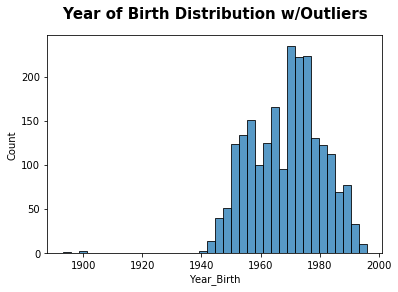

In [26]:
# Distibution of year birth
sns.histplot(md['Year_Birth'])
plt.title('Year of Birth Distribution w/Outliers', size=15, fontweight='bold', y=1.05)

In [27]:
# Converting outliers in year birth to median figures
md['Year_Birth'] = md['Year_Birth'].apply(lambda x: md['Year_Birth'].median() if x <= 1920 else x).astype(int)

Text(0.5, 1.05, 'Year of Birth Distribution')

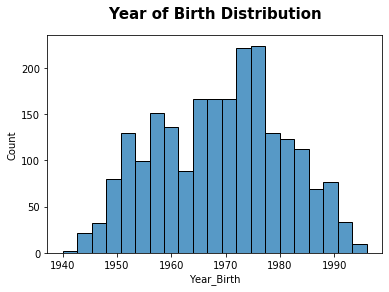

In [28]:
# Distibution of year birth after fix
sns.histplot(md['Year_Birth'])
plt.title('Year of Birth Distribution', size=15, fontweight='bold', y=1.05)

In [29]:
# Statistics
md.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.903125   52247.248661     0.444196     0.506250   
std     3246.662198    11.694144   25037.797168     0.538398     0.544538   
min        0.000000  1940.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35538.750000     0.000000     0.000000   
50%     5458.500000  1970.000000   51741.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68289.750000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Response     Complain  
count   2240.000000   2240.000000  2240.000000  2240.000000  
mean       0.064286      0.013393     0.149107     0.009375  
std        0.245316      0.114976     0.356274     0.096391  
min        0.000000      0.000000     0.000000     0.000000  
25%        0.000000      0.000000     0.000000     0.000000  
50%        0.000000      0.000000     0.000000     0.000000  
75%        0.000000      0.000000     0.000000     0.000000  
max        1.000000      1.000000     1.000000     1.000000

In [30]:
# Income outlier
md.loc[527:527]

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
527  9432        1977  Graduation       Together  666666        1         0   

    Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
527  2013-06-02       23         9         14               18   

     MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
527                8                 1            12                  4   

     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
527                3                    1                  3   

     NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
527                  6             0             0             0   

     AcceptedCmp1  AcceptedCmp2  Response  Complain       Country  
527             0             0         0         0  South Africa

In [31]:
md.dtypes

ID                              int64
Year_Birth                      int32
Education                      object
Marital_Status                 object
Income                          int32
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Response                        int64
Complain    

#### Are there any useful variables that we can engineer with the given data?

The `Kidhome` and `Teenhome` columns can be added together to create a single variable: `Dependents`.

In [32]:
# We can work out the total children in family per entry
md['Dependents'] = md['Kidhome'] + md['Teenhome']

The `Products` columns can be added together to create a single variable: `Total_Spent`.

In [33]:
# We can get the total product spend per entry
md['Total_Spent'] = md[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].sum(axis=1)

The `Purchases` columns can be added together to create a single variable: `Total_Purchases`. 

In [34]:
# We can get the total purchases per entry
md['Total_Purchases'] = md[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

The year can be subtracted from the `Year_Birth` columns to create a single variable for Age.

In [35]:
# We can get the age per customer
year = 2014
md['Age'] = year - md['Year_Birth'] # year = datetime.datetime.today().year can be used for finding current age

The `NumWebPurchases` and `NumWebVisitsMonth` can be `WebConversionRate` columns can be added together to create a single variable: `Total_Purchases`. 

In [36]:
# We can get the ratio of purchases to web visits per customer
md['WebConversionRate'] = (md['NumWebPurchases']/md['NumWebVisitsMonth']).round(2)

In [37]:
# Fill 5 NaN values created by 0 divided by 0 sums.
md['WebConversionRate'].fillna(0, inplace=True)

In [38]:
# Income to total purchase ratio
md['Income_Purchase_Ratio'] = (md['Total_Purchases']/md['Income']*100).round(3)

In [39]:
# Reordering columns
md.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Dependents',
       'Total_Spent', 'Total_Purchases', 'Age', 'WebConversionRate',
       'Income_Purchase_Ratio'],
      dtype='object')

In [40]:
md = md[['ID', 'Year_Birth', 'Age', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dependents', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Total_Spent', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'Total_Purchases', 'NumWebVisitsMonth', 'WebConversionRate', 'Income_Purchase_Ratio',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Response', 'Complain', 'Country']]

In [41]:
# Check results
md.head()

ID  Year_Birth  Age   Education Marital_Status  Income  Kidhome  \
0   1826        1970   44  Graduation       Divorced   84835        0   
1      1        1961   53  Graduation         Single   57091        0   
2  10476        1958   56  Graduation        Married   67267        0   
3   1386        1967   47  Graduation       Together   32474        1   
4   5371        1989   25  Graduation         Single   21474        1   

   Teenhome  Dependents Dt_Customer  Recency  MntWines  MntFruits  \
0         0           0  2014-06-16        0       189        104   
1         0           0  2014-06-15        0       464          5   
2         1           1  2014-05-13        0       134         11   
3         1           2  2014-05-11        0        10          0   
4         0           1  2014-04-08        0         6         16   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0              379              111               189           218   
1               64                7                 0            37   
2               59               15                 2            30   
3                1                0                 0             0   
4               24               11                 0            34   

   Total_Spent  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0         1190                  1                4                    4   
1          577                  1                7                    3   
2          251                  1                3                    2   
3           11                  1                1                    0   
4           91                  2                3                    1   

   NumStorePurchases  Total_Purchases  NumWebVisitsMonth  WebConversionRate  \
0                  6               15                  1               4.00   
1                  7               18                  5               1.40   
2                  5               11                  2               1.50   
3                  2                4                  7               0.14   
4                  2                8                  7               0.43   

   Income_Purchase_Ratio  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  \
0                  0.018             0             0             0   
1                  0.032             0             1             0   
2                  0.016             0             0             0   
3                  0.012             0             0             0   
4                  0.037             0             0             1   

   AcceptedCmp4  AcceptedCmp5  Response  Complain        Country  
0             0             0         1         0          Spain  
1             0             0         1         0         Canada  
2             0             0         0         0  United States  
3             0             0         0         0      Australia  
4             0             0         1         0          Spain

In [42]:
# Copy from reference
md_original.loc[960:961]

ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
960  6320        1976      Master         Single  $70,893.00         0   
961  5376        1979  Graduation        Married   $2,447.00         1   

     Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
960         0      2/6/13       42       768         44              561   
961         0      1/6/13       42         1          1             1725   

     MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
960               77                44            14                  1   
961                1                 1             1                 15   

     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
960                6                    6                 10   
961                0                   28                  0   

     NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
960                  3             0             0             0   
961                  1             0             0             0   

     AcceptedCmp1  AcceptedCmp2  Response  Complain Country  
960             0             0         0         0      SP  
961             0             0         0         0      US

In [43]:
income_purchase_df = md[['Income','Total_Purchases','Income_Purchase_Ratio']]

In [44]:
income_purchase_group = income_purchase_df.groupby('Total_Purchases').mean().round(3)
income_purchase_group['Income'] = income_purchase_group['Income'].round(2)
income_purchase_group.head()

Income  Income_Purchase_Ratio
Total_Purchases                                 
0                79802.75                  0.000
1                56696.00                  0.009
2                56647.00                  0.022
4                32396.26                  0.014
5                32304.40                  0.017

In [45]:
income_purchase_df[income_purchase_df['Total_Purchases'] == 43]

Income  Total_Purchases  Income_Purchase_Ratio
961    2447               43                  1.757

In [46]:
income_purchase_df.sort_values(by='Income_Purchase_Ratio', ascending=False)

Income  Total_Purchases  Income_Purchase_Ratio
961     2447               43                  1.757
1466    1730               15                  0.867
14      4428               25                  0.565
663     4023               15                  0.373
2063    7144               25                  0.350
1416    8028               16                  0.199
455     7500               12                  0.160
1434    7500               11                  0.147
1225    7500               11                  0.147
179     7500               11                  0.147
2222    7500               10                  0.133
144     7500               10                  0.133
562     7500               10                  0.133
182     9722               11                  0.113
1187    8820               10                  0.113
591     8940               10                  0.112
442     7500                8                  0.107
2173    7500                7                  0.093
1940   12571               11                  0.088
1526   22507               19                  0.084
1861   11012                9                  0.082
1353    7500                6                  0.080
1716   15056               12                  0.080
752    10245                8                  0.078
2076   34445               27                  0.078
1612   14515               11                  0.076
1074   13260               10                  0.075
781    10979                8                  0.073
782    10979                8                  0.073
2172   15072               11                  0.073
2200   23331               17                  0.073
1136   16927               12                  0.071
2163   17144               12                  0.070
2164   17144               12                  0.070
1175   10404                7                  0.067
2220   24401               16                  0.066
1997   50898               33                  0.065
1800   17148               11                  0.064
206    15716               10                  0.064
2174   17117               11                  0.064
2001   46772               30                  0.064
370    33051               21                  0.064
740     9548                6                  0.063
958    16014               10                  0.062
713    37070               23                  0.062
714    37070               23                  0.062
896    14849                9                  0.061
1164   30168               18                  0.060
1953   14906                9                  0.060
1615   44802               27                  0.060
1768   40464               24                  0.059
561    52278               31                  0.059
226    42720               25                  0.059
127    49505               29                  0.059
2080   52973               31                  0.059
560    52278               31                  0.059
1686   54108               32                  0.059
2041   27683               16                  0.058
1262   57333               33                  0.058
903    44511               26                  0.058
1718   67309               39                  0.058
1041   36130               21                  0.058
26     54450               31                  0.057
1635   54693               31                  0.057
493    46014               26                  0.057
1819   37150               21                  0.057
27     54450               31                  0.057
2040   49118               28                  0.057
1724   19419               11                  0.057
269    46049               26                  0.056
638    30538               17                  0.056
658    42564               24                  0.056
171    30522               17                  0.056
134    52247               29                  0.056
2210   44529               25  

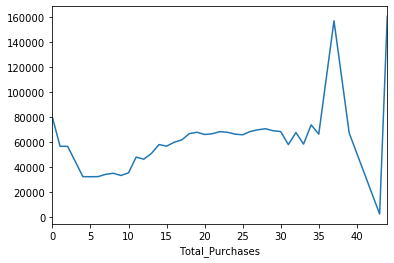

In [47]:
income_purchase_group['Income'].plot(kind = 'line')

#### Are there any variables that warrant transformations?

We added `Age` alongside `Year_Birth` to age by subtracting the `Year_Birth` value from date of dataset `2014` to calculate customers ages.

<a id='section02'></a>
### Section 2: Statistical Analysis 📊

> Please run statistical tests in the form of regressions to answer these questions & propose data-driven action recommendations to your CMO. Make sure to interpret your results with non-statistical jargon so your CMO can understand your findings.

- What factors are significantly related to the number of store purchases?
- Does US fare significantly better than the Rest of the World in terms of total purchases?
- Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test
- Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish? (Hint: use your knowledge of interaction variables/effects)
- Is there a significant relationship between geographical regional and success of a campaign?

#### What factors are significantly related to the number of store purchases?

In [48]:
# Statistical tests
md.head()

ID  Year_Birth  Age   Education Marital_Status  Income  Kidhome  \
0   1826        1970   44  Graduation       Divorced   84835        0   
1      1        1961   53  Graduation         Single   57091        0   
2  10476        1958   56  Graduation        Married   67267        0   
3   1386        1967   47  Graduation       Together   32474        1   
4   5371        1989   25  Graduation         Single   21474        1   

   Teenhome  Dependents Dt_Customer  Recency  MntWines  MntFruits  \
0         0           0  2014-06-16        0       189        104   
1         0           0  2014-06-15        0       464          5   
2         1           1  2014-05-13        0       134         11   
3         1           2  2014-05-11        0        10          0   
4         0           1  2014-04-08        0         6         16   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0              379              111               189           218   
1               64                7                 0            37   
2               59               15                 2            30   
3                1                0                 0             0   
4               24               11                 0            34   

   Total_Spent  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0         1190                  1                4                    4   
1          577                  1                7                    3   
2          251                  1                3                    2   
3           11                  1                1                    0   
4           91                  2                3                    1   

   NumStorePurchases  Total_Purchases  NumWebVisitsMonth  WebConversionRate  \
0                  6               15                  1               4.00   
1                  7               18                  5               1.40   
2                  5               11                  2               1.50   
3                  2                4                  7               0.14   
4                  2                8                  7               0.43   

   Income_Purchase_Ratio  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  \
0                  0.018             0             0             0   
1                  0.032             0             1             0   
2                  0.016             0             0             0   
3                  0.012             0             0             0   
4                  0.037             0             0             1   

   AcceptedCmp4  AcceptedCmp5  Response  Complain        Country  
0             0             0         1         0          Spain  
1             0             0         1         0         Canada  
2             0             0         0         0  United States  
3             0             0         0         0      Australia  
4             0             0         1         0          Spain

In [49]:
from sklearn import linear_model

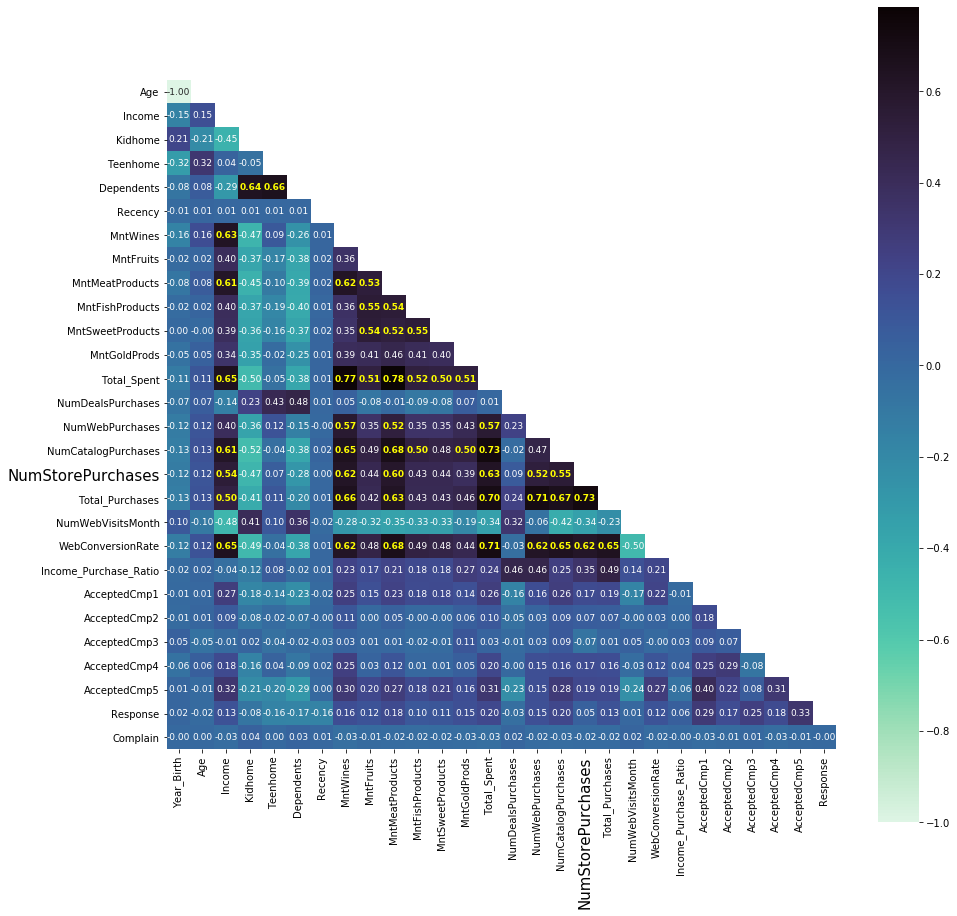

In [50]:
# Assign variable to corr for plot
corr = md.drop(columns='ID').select_dtypes(include = np.number).corr(method = 'kendall')

# Add mask
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Adjust mask and df
mask = mask[1:, :-1]
corr = corr.iloc[1:,:-1].copy()

# Plot heatmap
fig, ax = plt.subplots( 1, 1, figsize = (15, 15))
sns.heatmap(corr, ax = ax, annot = True, annot_kws={"fontsize":9}, fmt = '.2f', square = True, cmap='mako_r', mask = mask)

# Highlight store purchases label
ax.get_yticklabels()[16].set_size(15)
ax.get_xticklabels()[17].set_size(15)

# Highlight significant factors
for text in ax.texts:
    if text.get_text() >= '0.5':
        text.set_weight('bold')
        text.set_color('Yellow')

plt.show()

**The top 5 factors related to store purchases in order are:**
1. Wine Products
2. Meat Products
3. Catalogue Purchases
4. Income 
5. Web Purchases

In [51]:
kid_webvis = md[['Kidhome','NumWebVisitsMonth']].groupby(by='Kidhome').mean()
kid_webvis

NumWebVisitsMonth
Kidhome                   
0                 4.353442
1                 6.629588
2                 6.666667

In [52]:
teen_webvis = md[['Teenhome','NumWebVisitsMonth']].groupby(by='Teenhome').mean()
teen_webvis

NumWebVisitsMonth
Teenhome                   
0                  4.981002
1                  5.683495
2                  5.519231

In [53]:
kid_buy = md[['Kidhome','NumStorePurchases']].groupby(by='Kidhome').mean()
kid_buy

NumStorePurchases
Kidhome                   
0                 7.217324
1                 3.863181
2                 3.437500

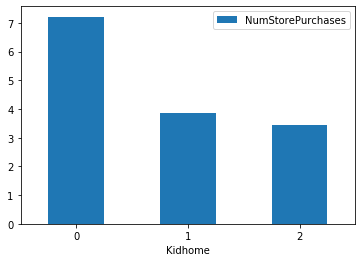

In [54]:
kid_buy.plot(kind='bar', rot=0)
plt.show()

In [55]:
teen_buy = md[['Teenhome','NumStorePurchases']].groupby(by='Teenhome').mean()
teen_buy

NumStorePurchases
Teenhome                   
0                  5.637306
1                  5.938835
2                  6.250000

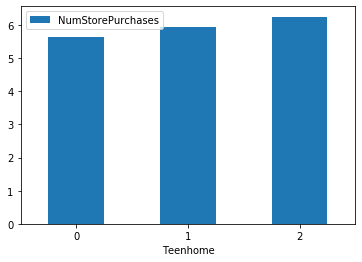

In [56]:
teen_buy.plot(kind='bar', rot=0)
plt.show()

In [57]:
status_buy = md[['Marital_Status','NumStorePurchases']].groupby(by='Marital_Status').sum().sort_values(by='NumStorePurchases', ascending=False)
status_buy

NumStorePurchases
Marital_Status                   
Married                      5055
Together                     3327
Single                       2707
Divorced                     1350
Widow                         494
Absurd                         13
Alone                          12
YOLO                           12

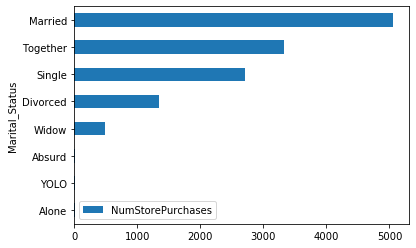

In [58]:
status_buy.sort_values(by='NumStorePurchases', ascending=True).plot(kind='barh', rot=0)
plt.show()

In [59]:
income_buy = md[['Income','NumStorePurchases']].groupby(by='NumStorePurchases').mean().sort_values(by='NumStorePurchases', ascending=True)
income_buy = income_buy.round()
income_buy

Income
NumStorePurchases         
0                  55413.0
1                  79103.0
2                  31127.0
3                  34205.0
4                  45689.0
5                  59149.0
6                  60966.0
7                  65061.0
8                  63115.0
9                  69065.0
10                 70824.0
11                 69881.0
12                 69823.0
13                 71385.0

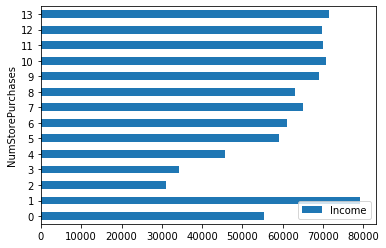

In [60]:
income_buy.plot(kind='barh', rot=0)

In [61]:
# Recency vs Buy
recency_buy = md[['Recency','NumStorePurchases']].groupby(by='NumStorePurchases').mean().sort_values(by='Recency', ascending=True)
recency_buy

Recency
NumStorePurchases           
7                  43.489510
0                  43.933333
13                 44.361446
1                  44.571429
8                  46.402685
2                  46.569507
12                 47.657143
4                  49.337461
6                  49.426966
3                  50.038776
9                  51.273585
10                 51.936000
5                  52.514151
11                 55.765432

From exploring the data further we can see more children at home increases web visits but decreases the amount of store purchases per customer which is strange. Marital status can effect the amount of store purchases, married customers generally spend more than other customers on average. The last correlation is the amount of store purchases increases with income.

#### Does US fare significantly better than the Rest of the World in terms of total purchases?

In [62]:
md[['NumStorePurchases','Country']].groupby('Country').sum().sort_values(by='NumStorePurchases', ascending=False)

NumStorePurchases
Country                         
Spain                       6352
South Africa                1988
Canada                      1568
Australia                    879
India                        785
Germany                      721
United States                658
Montenegro                    19

In [63]:
md[['NumStorePurchases','Country']].groupby('Country').sum().sort_values(by='NumStorePurchases', ascending=False).pct_change()

NumStorePurchases
Country                         
Spain                        NaN
South Africa           -0.687028
Canada                 -0.211268
Australia              -0.439413
India                  -0.106940
Germany                -0.081529
United States          -0.087379
Montenegro             -0.971125

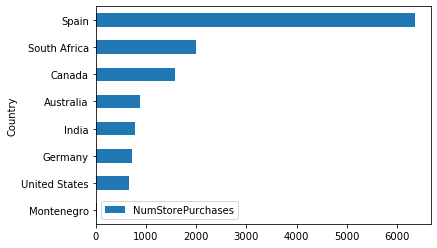

In [64]:
md[['NumStorePurchases','Country']].groupby('Country').sum().sort_values(by='NumStorePurchases', ascending=True).plot(kind='Barh')

United States ranks rather poorly compared to the Rest of the World in terms of total purchases ranking second to bottom with only 658 purchases. Spain is the highest with 6352 and Montenegro is the lowest with just 19.

#### Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test.

In [65]:
# Comparing the mean number of purchases for people who spent above and bellow average amounts on gold

# Above Average Gold
gold_buy_high = md[['MntGoldProds','NumStorePurchases']][md['MntGoldProds'] >= md['MntGoldProds'].mean()] 

# Below Average Gold
gold_buy_low = md[['MntGoldProds','NumStorePurchases']][md['MntGoldProds'] <= md['MntGoldProds'].mean()]

# Result
gold_buy_high['NumStorePurchases'].mean(), gold_buy_low['NumStorePurchases'].mean()

(7.765129682997118, 4.903622250970246)

In [66]:
# Filtering above average gold purchases
md[['MntGoldProds','NumStorePurchases']][md['MntGoldProds'] >= md['MntGoldProds'].mean()].groupby(by='NumStorePurchases').mean().sort_values(by='NumStorePurchases', ascending=False)

MntGoldProds
NumStorePurchases              
13                   115.577778
12                   106.529412
11                   109.976190
10                    98.901639
9                    115.210526
8                    105.349398
7                     94.724638
6                     99.864198
5                    108.130952
4                    108.633333
3                    104.178571
2                     54.916667
1                    276.500000
0                    341.500000

I can justify the statement of the supervisor that people who spent anb above average amount on gold in the last 2 years would have more instore purchases. The data suggests people who invest an above average amount in gold make 7.7 store purchases on average. However, people who invest a below average amount in gold make just 4.9 store purchases.

#### Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish?

###### Married PhD Candidates' Fish Sales

In [67]:
# PhD & Married
phd_m = md[(md['Education'] == 'PhD') & (md['Marital_Status'] == 'Married')] 

# Non PhD & Married
phd_o = md[(md['Education'] != 'PhD') & (md['Marital_Status'] != 'Married')] 

In [68]:
# All vs PhD & Married
md['MntFishProducts'].mean(), phd_m['MntFishProducts'].mean()

(37.52544642857143, 27.015625)

In [69]:
# Non-PhD & Married vs PhD & Married
phd_o['MntFishProducts'].mean(), phd_m['MntFishProducts'].mean()

(42.22273567467653, 27.015625)

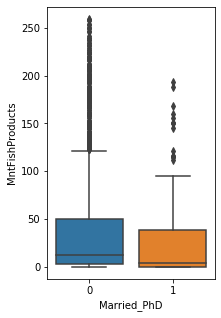

In [70]:
# Create a boxplot to compare Fish product sales of Married with a PhD customer vs other
phd_fish = md.copy()
phd_fish['Married_PhD'] = phd_fish['Marital_Status'] + phd_fish['Education']
phd_fish['Married_PhD'] = phd_fish['Married_PhD'].apply(lambda x: 1 if x == 'MarriedPhD' else 0)

# Plot
plt.figure(figsize=(3,5))
sns.boxplot(x = 'Married_PhD', y = 'MntFishProducts', data = phd_fish)

In [71]:
status_group = md[['Education','MntFishProducts','Marital_Status']].groupby(['Education','Marital_Status']).mean() #.sort_values(by='MntFishProducts', ascending=False)
round(status_group, 2)

MntFishProducts
Education  Marital_Status                 
2n Cycle   Divorced                  33.22
           Married                   41.60
           Single                    39.54
           Together                  61.82
           Widow                    103.60
Basic      Divorced                  10.00
           Married                   27.95
           Single                     9.78
           Together                  10.14
           Widow                     34.00
Graduation Absurd                   212.00
           Alone                     19.00
           Divorced                  37.58
           Married                   41.38
           Single                    45.09
           Together                  45.35
           Widow                     47.89
Master     Absurd                   199.00
           Alone                      0.00
           Divorced                  29.46
           Married                   25.62
           Single                    39.00
           Together                  30.81
           Widow                     71.83
PhD        Alone                      4.00
           Divorced                  34.50
           Married                   27.02
           Single                    24.66
           Together                  23.19
           Widow                     36.12
           YOLO                       4.00

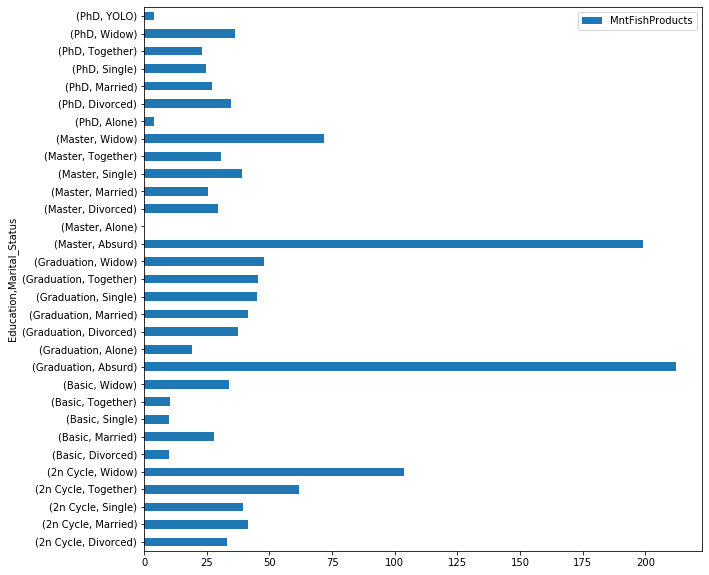

In [72]:
# Comparing fish product sales of every educational group
status_group.plot(kind='barh', figsize=(10,10))

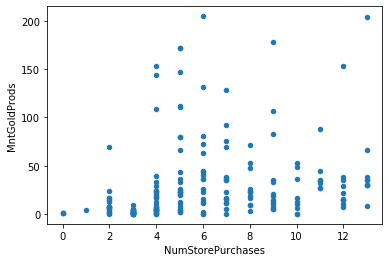

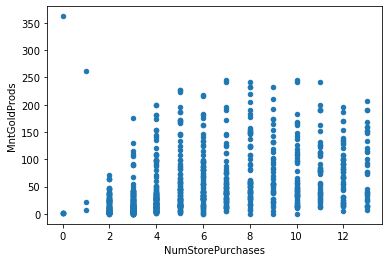

In [73]:
# Scatter plot
phd_m.plot.scatter(x='NumStorePurchases', y='MntGoldProds'), 
phd_o.plot.scatter(x='NumStorePurchases', y='MntGoldProds')

###### Country Fish Sales

In [74]:
# Total sales by country
md[['MntFishProducts','Country']].groupby('Country').sum().sort_values(by='MntFishProducts', ascending=False)

MntFishProducts
Country                       
Spain                    40265
South Africa             13670
Canada                   10028
Australia                 5834
India                     4830
Germany                   4767
United States             4437
Montenegro                 226

In [75]:
# Average sales by country
md[['MntFishProducts','Country']].groupby('Country').mean().sort_values(by='MntFishProducts', ascending=False)

MntFishProducts
Country                       
Montenegro           75.333333
United States        40.706422
South Africa         40.563798
Germany              39.725000
Canada               37.417910
Spain                36.771689
Australia            36.462500
India                32.635135

###### Kid Fish Sales

In [76]:
md[['MntFishProducts','Kidhome']].groupby('Kidhome').mean().sort_values(by='MntFishProducts', ascending=False)

MntFishProducts
Kidhome                 
0              56.162413
1              12.311457
2               7.729167

###### Children Fish Sales

In [77]:
md[['MntFishProducts','Kidhome']].groupby('Kidhome').mean().sort_values(by='MntFishProducts', ascending=False)

MntFishProducts
Kidhome                 
0              56.162413
1              12.311457
2               7.729167

Married PhD candidates do not have a significant relation with amount spent on fish. Spain has the highest amount of fish purchases by a wide margin at 40,265 with the next best country being South Africa with 13,670.

In [78]:
md.columns

Index(['ID', 'Year_Birth', 'Age', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dependents', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'Total_Spent', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'Total_Purchases', 'NumWebVisitsMonth', 'WebConversionRate',
       'Income_Purchase_Ratio', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'Country'],
      dtype='object')

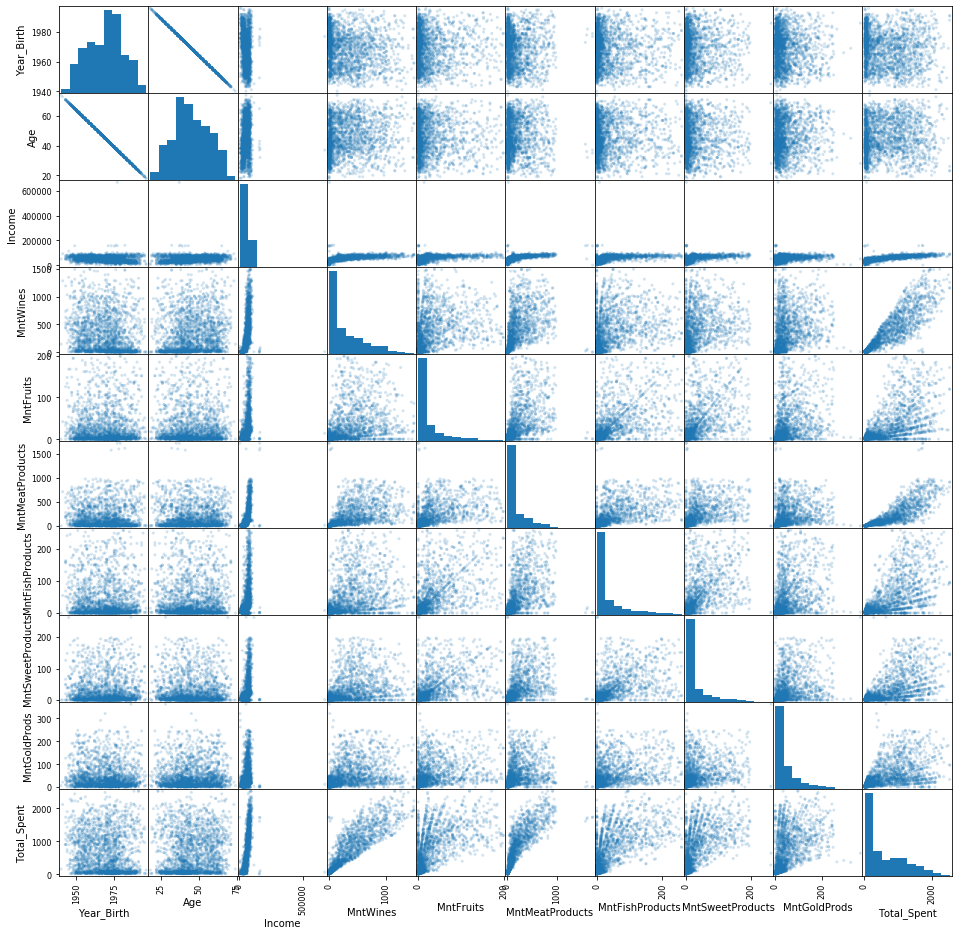

In [79]:
col_list = ['Year_Birth', 'Age', 'Income', 'MntWines', 'MntFruits', 
            'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 
            'MntGoldProds', 'Total_Spent']

md_test = md.filter(items=col_list)

pd.plotting.scatter_matrix(md_test, alpha=0.2,figsize=(16,16))
plt.show()

#### Is there a significant relationship between geographical region and success of a campaign?

In [80]:
camp = md[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Country']].groupby('Country').sum()
camp['Total'] = camp.sum(axis=1)-camp['Response']
camp = camp.sort_values(by='Total', ascending=False)
camp.loc["Total"] = camp.sum()
camp

AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
Country                                                                 
Spain                    78            16            83            89   
Canada                   18             6            18            24   
South Africa             20             4            21            20   
India                     7             2            13            11   
Germany                   7             2            10            11   
Australia                 7             0             9             6   
United States             7             0             8             6   
Montenegro                0             0             1             0   
Total                   144            30           163           167   

               AcceptedCmp5  Response  Total  
Country                                       
Spain                    89       176    355  
Canada                   21        38     87  
South Africa             21        52     86  
India                     6        13     39  
Germany                   8        17     38  
Australia                13        23     35  
United States             5        13     26  
Montenegro                0         2      1  
Total                   163       334    667

In [81]:
round(camp.pct_change(axis='columns'), 2)*100

AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
Country                                                                 
Spain                   NaN         -79.0         419.0           7.0   
Canada                  NaN         -67.0         200.0          33.0   
South Africa            NaN         -80.0         425.0          -5.0   
India                   NaN         -71.0         550.0         -15.0   
Germany                 NaN         -71.0         400.0          10.0   
Australia               NaN        -100.0           inf         -33.0   
United States           NaN        -100.0           inf         -25.0   
Montenegro              NaN           NaN           inf        -100.0   
Total                   NaN         -79.0         443.0           2.0   

               AcceptedCmp5  Response  Total  
Country                                       
Spain                   0.0      98.0  102.0  
Canada                -12.0      81.0  129.0  
South Africa            5.0     148.0   65.0  
India                 -45.0     117.0  200.0  
Germany               -27.0     112.0  124.0  
Australia             117.0      77.0   52.0  
United States         -17.0     160.0  100.0  
Montenegro              NaN       inf  -50.0  
Total                  -2.0     105.0  100.0

Text(0, 0.5, 'Country')

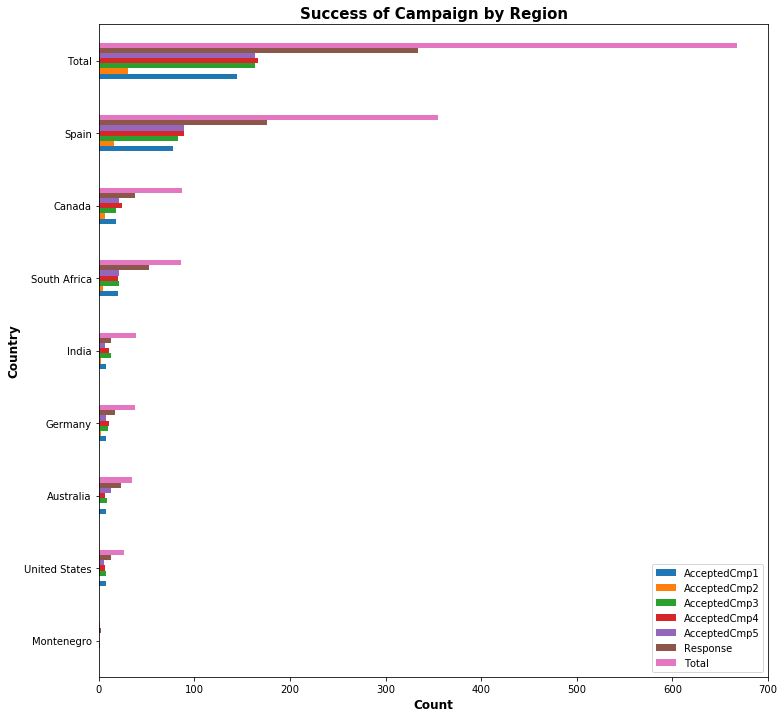

In [82]:
camp.sort_values(by='Total', ascending=True).plot(kind='barh', figsize=(12,12))
plt.title('Success of Campaign by Region', fontweight='bold', fontsize=15)
plt.xlabel('Count', fontweight='bold', fontsize=12)
plt.ylabel('Country', fontweight='bold', fontsize=12)

From this data we can see that Spain has the most success in marketing campaigns followed by Canada and South Africa. Most customers are more likely to accept an offer in the 4th or 5th campaign compared to the 1st.

<a id='section03'></a>
### Section 3: Data Visualization 📈

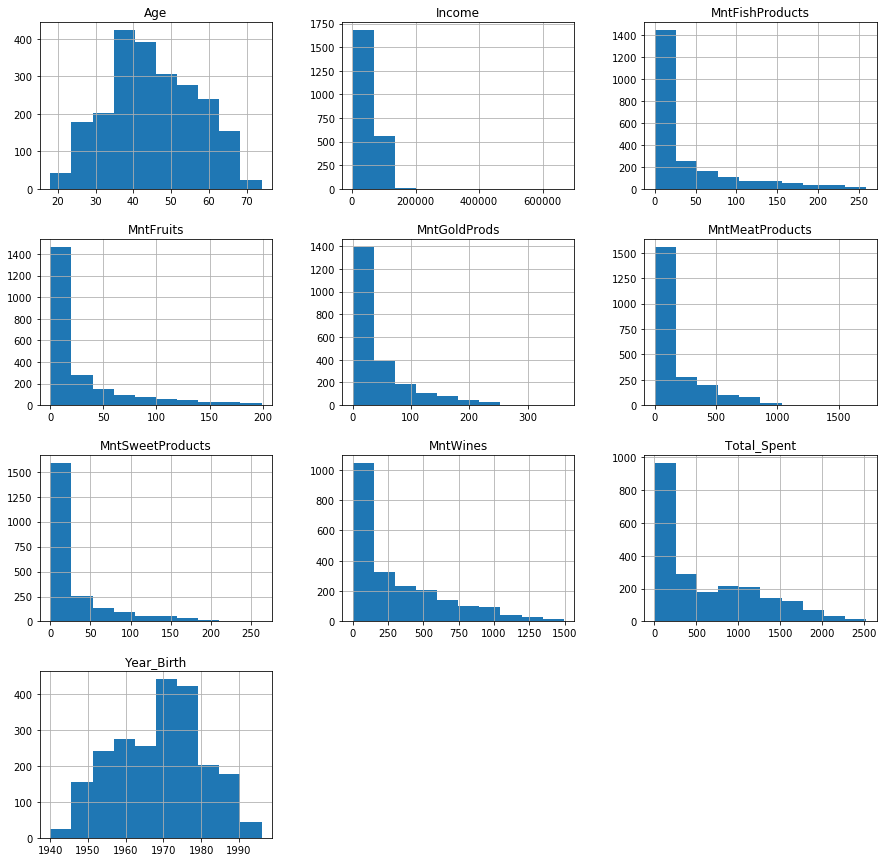

In [83]:
md_test.hist(figsize=(15,15))
plt.show()

In [84]:
md['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [85]:
# Who has the most kids?
md['Kidhome'].value_counts()

0    1293
1     899
2      48
Name: Kidhome, dtype: int64

In [86]:
# Who has the most teens?
md['Teenhome'].value_counts()

0    1158
1    1030
2      52
Name: Teenhome, dtype: int64

In [87]:
# Who has the most total children
md['Dependents'].value_counts()

1    1128
0     638
2     421
3      53
Name: Dependents, dtype: int64

In [88]:
# 3 total children filter
md[md['Dependents'] == 3].head()

ID  Year_Birth  Age   Education Marital_Status  Income  Kidhome  \
19   2795        1958   56      Master         Single   30523        2   
32   5824        1972   42         PhD       Together   34578        2   
52   7264        1978   36    2n Cycle         Single   52195        2   
84   8461        1962   52  Graduation       Divorced   46102        2   
134  8996        1957   57         PhD        Married   52247        2   

     Teenhome  Dependents Dt_Customer  Recency  MntWines  MntFruits  \
19          1           3  2013-07-01        0         5          0   
32          1           3  2014-04-11        1         7          0   
52          1           3  2014-05-12        2        12          0   
84          1           3  2014-03-10        3        14          0   
134         1           3  2012-11-19        4       230         42   

     MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
19                 3                0                 0             5   
32                 1                0                 0             0   
52                 4                0                 0             1   
84                 1                0                 0             1   
134              192               49                37            53   

     Total_Spent  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
19            13                  1                1                    0   
32             8                  1                1                    0   
52            17                  1                1                    0   
84            16                  1                1                    0   
134          603                 12                7                    2   

     NumStorePurchases  Total_Purchases  NumWebVisitsMonth  WebConversionRate  \
19                   2                4                  7               0.14   
32                   2                4                  6               0.17   
52                   2                4                  8               0.12   
84                   2                4                  7               0.14   
134                  8               29                  9               0.78   

     Income_Purchase_Ratio  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  \
19                   0.013             0             0             0   
32                   0.012             0             0             0   
52                   0.008             0             0             0   
84                   0.009             0             0             0   
134                  0.056             0             0             0   

     AcceptedCmp4  AcceptedCmp5  Response  Complain       Country  
19              0             0         0         0        Canada  
32              0             0         0         0     Australia  
52              0             0         0         0  South Africa  
84              0             0         0         0         Spain  
134             0             0         0         0       Germany

In [89]:
# Total children at home per country dataframe
children_country = pd.DataFrame(md['Dependents'].groupby(md['Country']).value_counts(sort=False)).unstack(fill_value=0).stack()
children_country.rename(columns={"Dependents":"Total_Count"}, inplace=True)
children_country_2 = pd.DataFrame(md['Country'].groupby(md['Dependents']).value_counts(sort=False)).unstack(fill_value=0).stack()
children_country_2.rename(columns={"Country":"Total_Count"}, inplace=True)
children_country_plot = children_country.sort_index(ascending=False)

In [90]:
children_country_2

Total_Count
Dependents Country                   
0          Australia               39
           Canada                  75
           Germany                 41
           India                   39
           Montenegro               1
           South Africa            97
           Spain                  313
           United States           33
1          Australia               82
           Canada                 134
           Germany                 58
           India                   72
           Montenegro               2
           South Africa           165
           Spain                  560
           United States           55
2          Australia               33
           Canada                  50
           Germany                 19
           India                   33
           Montenegro               0
           South Africa            65
           Spain                  203
           United States           18
3          Australia                6
           Canada                   9
           Germany                  2
           India                    4
           Montenegro               0
           South Africa            10
           Spain                   19
           United States            3

In [91]:
# Total children at home per country
children_country

Total_Count
Country       Dependents             
Australia     0                    39
              1                    82
              2                    33
              3                     6
Canada        0                    75
              1                   134
              2                    50
              3                     9
Germany       0                    41
              1                    58
              2                    19
              3                     2
India         0                    39
              1                    72
              2                    33
              3                     4
Montenegro    0                     1
              1                     2
              2                     0
              3                     0
South Africa  0                    97
              1                   165
              2                    65
              3                    10
Spain         0                   313
              1                   560
              2                   203
              3                    19
United States 0                    33
              1                    55
              2                    18
              3                     3

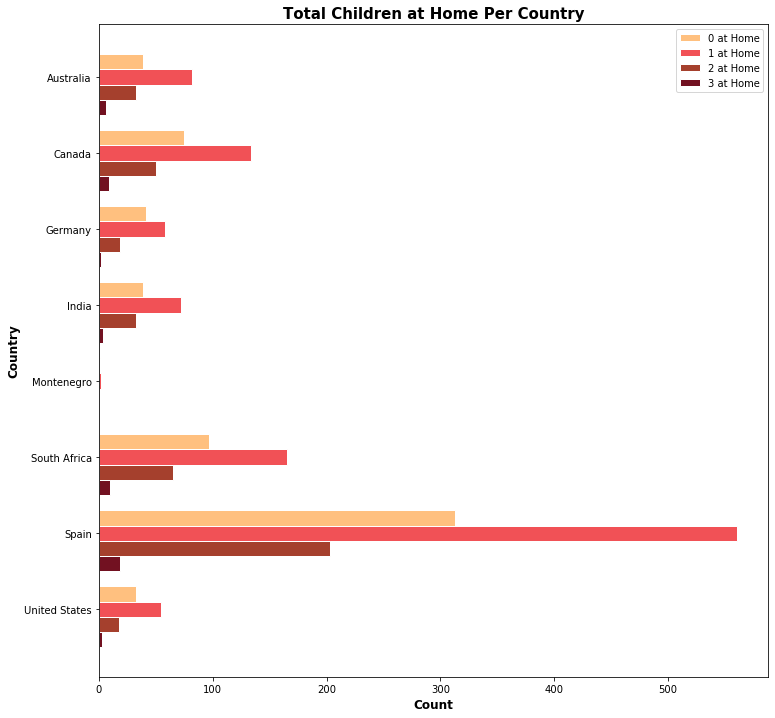

In [92]:
# size
f, ax = plt.subplots(figsize=(12,12))

# Invert y axis
plt.gca().invert_yaxis()

# set width of bars
barWidth = 0.20
 
# set heights of bars / Multindex query to extract info from list
bars0 = children_country.query('Dependents == "0"')['Total_Count']
bars1 = children_country.query('Dependents == "1"')['Total_Count']
bars2 = children_country.query('Dependents == "2"')['Total_Count']
bars3 = children_country.query('Dependents == "3"')['Total_Count']
 
# Set position of bar on X axis
r0 = np.arange(len(bars1))
r1 = [y + barWidth for y in r0]
r2 = [y + barWidth for y in r1]
r3 = [y + barWidth for y in r2]
 
# Make the plot
ax.barh(r0, bars0, color='#FFC07F', height=barWidth, edgecolor='white', label='0 at Home')
ax.barh(r1, bars1, color='#F15156', height=barWidth, edgecolor='white', label='1 at Home')
ax.barh(r2, bars2, color='#A5402D', height=barWidth, edgecolor='white', label='2 at Home')
ax.barh(r3, bars3, color='#721121', height=barWidth, edgecolor='white', label='3 at Home')
 
# Add xticks on the middle of the group bars, add axes labels
plt.title('Total Children at Home Per Country', fontweight='bold', fontsize=15)
plt.xlabel('Count', fontweight='bold', fontsize=12)
plt.ylabel('Country', fontweight='bold', fontsize=12)
plt.yticks([r + barWidth for r in range(len(bars1))], ['Australia', 'Canada', 'Germany', 'India', 'Montenegro', 'South Africa', 'Spain', 'United States'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

In [93]:
md3kids = md[md['Dependents'] == 3]
md3kids['Dependents'].groupby(md['Country']).value_counts(sort=True).sort_values(ascending=False)

Country        Dependents
Spain          3             19
South Africa   3             10
Canada         3              9
Australia      3              6
India          3              4
United States  3              3
Germany        3              2
Name: Dependents, dtype: int64

In [94]:
md[md['Country'] == 'Montenegro'].mean()

ID                        5774.333333
Year_Birth                1972.333333
Age                         41.666667
Income                   57680.333333
Kidhome                      0.000000
Teenhome                     0.666667
Dependents                   0.666667
Recency                     26.666667
MntWines                   576.333333
MntFruits                    2.666667
MntMeatProducts            272.333333
MntFishProducts             75.333333
MntSweetProducts            40.666667
MntGoldProds                73.333333
Total_Spent               1040.666667
NumDealsPurchases            2.333333
NumWebPurchases              6.000000
NumCatalogPurchases          5.000000
NumStorePurchases            6.333333
Total_Purchases             19.666667
NumWebVisitsMonth            6.000000
WebConversionRate            1.500000
Income_Purchase_Ratio        0.035333
AcceptedCmp1                 0.000000
AcceptedCmp2                 0.000000
AcceptedCmp3                 0.333333
AcceptedCmp4

In [95]:
md['MntMeatProducts'].groupby(md['Country']).mean()

Country
Australia        144.356250
Canada           172.194030
Germany          173.950000
India            171.189189
Montenegro       272.333333
South Africa     173.287834
Spain            163.508676
United States    185.834862
Name: MntMeatProducts, dtype: float64

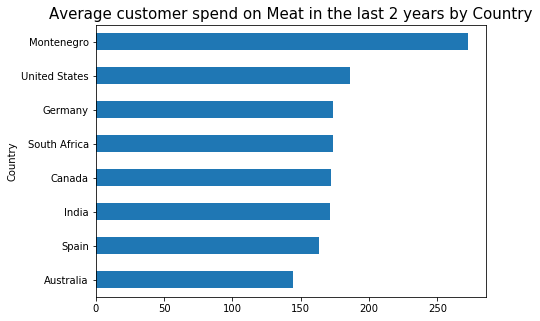

In [96]:
# Plot
md['MntMeatProducts'].groupby(md['Country']).mean().sort_values(ascending=True).plot(kind = 'barh', figsize=(7, 5), rot=0, legend=None)

# Title
plt.title('Average customer spend on Meat in the last 2 years by Country', fontsize = 15)
plt.show()

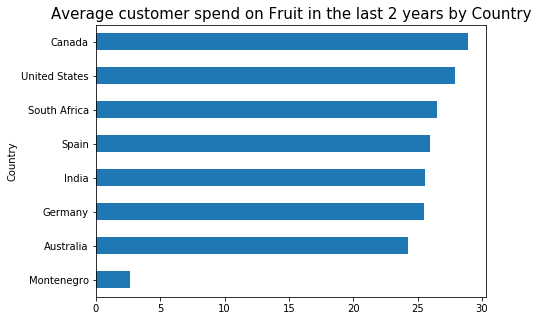

In [97]:
# Plot
md['MntFruits'].groupby(md['Country']).mean().sort_values(ascending=True).plot(kind = 'barh', figsize=(7, 5), rot=0, legend=None)

# Title
plt.title('Average customer spend on Fruit in the last 2 years by Country', fontsize = 15)
plt.show()

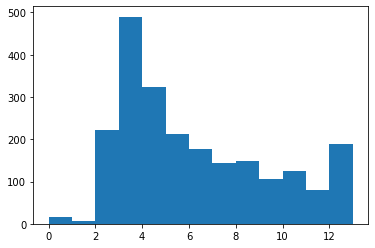

In [98]:
# Plot store purchases
bins = md['NumStorePurchases'].max()
plt.hist(md['NumStorePurchases'], bins)
plt.show()

<a id='section04'></a>
### Section 4: CMO Recommendations 📝

In [99]:
md[md['Income'] >= 100000]

ID  Year_Birth  Age   Education Marital_Status  Income  Kidhome  \
142   10089        1974   40  Graduation       Divorced  102692        0   
210    4619        1945   69         PhD         Single  113734        0   
325    4931        1977   37  Graduation       Together  157146        0   
497    1501        1982   32         PhD        Married  160803        0   
527    9432        1977   37  Graduation       Together  666666        1   
731    1503        1976   38         PhD       Together  162397        1   
832    4611        1970   44  Graduation       Together  105471        0   
853    5336        1971   43      Master       Together  157733        1   
1244   2798        1977   37         PhD       Together  102160        0   
1564   7215        1983   31  Graduation         Single  101970        0   
1826   5555        1975   39  Graduation       Divorced  153924        0   
1925  11181        1949   65         PhD        Married  156924        0   
2204   8475        1973   41         PhD        Married  157243        0   

      Teenhome  Dependents Dt_Customer  Recency  MntWines  MntFruits  \
142          0           0  2013-04-05        5       168        148   
210          0           0  2014-05-28        9         6          2   
325          0           0  2013-04-29       13         1          0   
497          0           0  2012-08-04       21        55         16   
527          0           1  2013-06-02       23         9         14   
731          1           2  2013-06-03       31        85          1   
832          0           0  2013-01-21       36      1009        181   
853          0           1  2013-06-04       37        39          1   
1244         0           0  2012-11-02       54       763         29   
1564         0           0  2013-03-12       69       722         27   
1826         0           0  2014-02-07       81         1          1   
1925         0           0  2013-08-29       85         2          1   
2204         1           1  2014-03-01       98        20          2   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
142               444               32               172           148   
210                 3                1               262             3   
325              1725                2                 1             1   
497              1622               17                 3             4   
527                18                8                 1            12   
731                16                2                 1             2   
832               104              202                21           207   
853                 9                2                 0             8   
1244              138               76               176            58   
1564              102               44                72           168   
1826                1                1                 1             1   
1925                2                1                 1             1   
2204             1582                1                 2             1   

      Total_Spent  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
142          1112                  1                6                    9   
210           277                  0               27                    0   
325          1730                  0                0                   28   
497          1717                 15                0                   28   
527            62                  4                3                    1   
731           107                  0                0                    0   
832          1724                  0                9                    8   
853            59                  0                1                    0   
1244         1240                  0                7                    9   
1564         1135                  0                6                    8   
1826            6                  0    

In [100]:
#md['Dt_Customer'] = md['Dt_Customer'].str.replace('/', '')

In [101]:
# Income column has a gap in title
# Income needs to be integer
# 24 entries are missing from Income
# DT Customer needs to be Datetime

#### Which marketing campaign is most successful?

In [102]:
md.columns

Index(['ID', 'Year_Birth', 'Age', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dependents', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'Total_Spent', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'Total_Purchases', 'NumWebVisitsMonth', 'WebConversionRate',
       'Income_Purchase_Ratio', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'Country'],
      dtype='object')

In [103]:
campaign_success = md[['AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum()

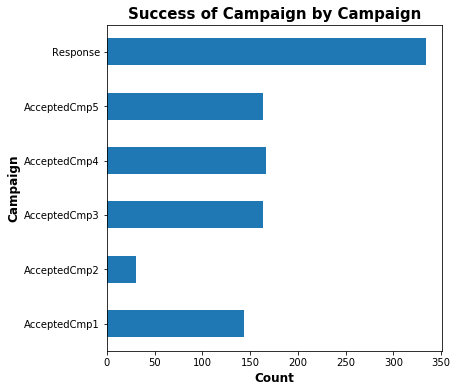

In [104]:
campaign_success.plot(kind='barh', figsize=(6,6), rot=0)
plt.title('Success of Campaign by Campaign', fontweight='bold', fontsize=15)
plt.xlabel('Count', fontweight='bold', fontsize=12)
plt.ylabel('Campaign', fontweight='bold', fontsize=12)
plt.show()

In [105]:
campaign_success_country = md[['AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].groupby(md['Country']).sum()
campaign_success_country

AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
Country                                                                 
Australia                 7             0             9             6   
Canada                   18             6            18            24   
Germany                   7             2            10            11   
India                     7             2            13            11   
Montenegro                0             0             1             0   
South Africa             20             4            21            20   
Spain                    78            16            83            89   
United States             7             0             8             6   

               AcceptedCmp5  Response  
Country                                
Australia                13        23  
Canada                   21        38  
Germany                   8        17  
India                     6        13  
Montenegro                0         2  
South Africa             21        52  
Spain                    89       176  
United States             5        13

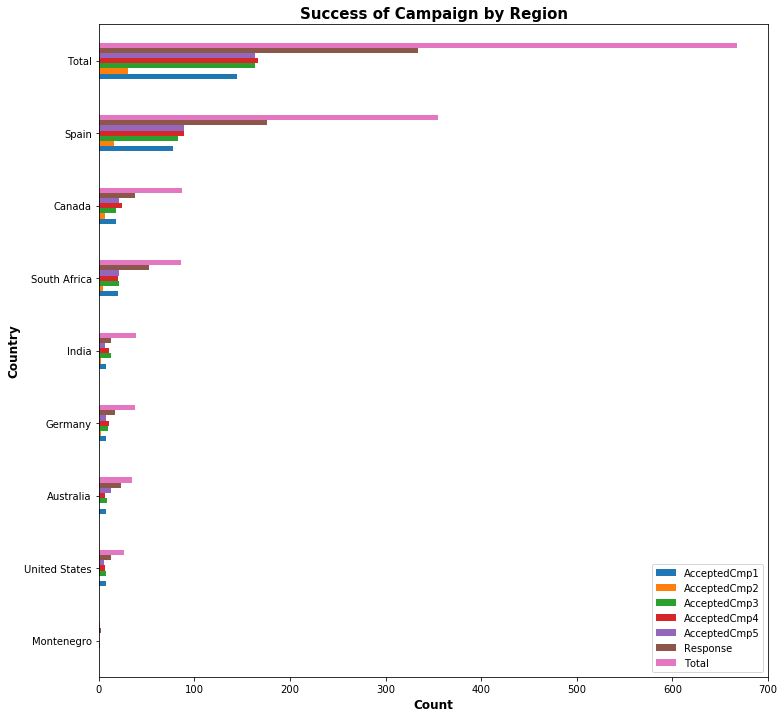

In [106]:
camp.sort_values(by='Total', ascending=True).plot(kind='barh', figsize=(12,12))
plt.title('Success of Campaign by Region', fontweight='bold', fontsize=15)
plt.xlabel('Count', fontweight='bold', fontsize=12)
plt.ylabel('Country', fontweight='bold', fontsize=12)
plt.show()

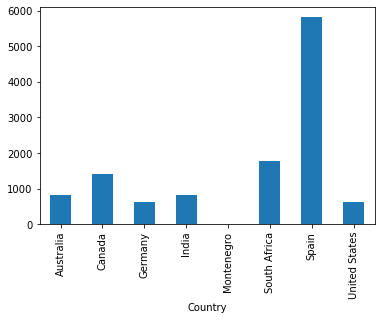

In [107]:
# Last month web visits
web_success = md['NumWebVisitsMonth'].groupby([md['Country']]).sum()
web_success.plot(kind='bar')

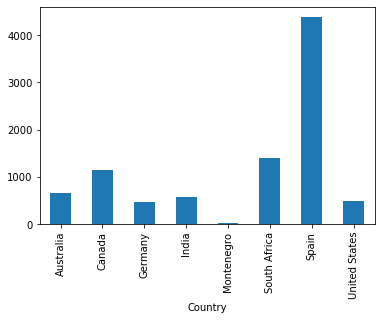

In [108]:
web_purchases = md['NumWebPurchases'].groupby([md['Country']]).sum()
web_purchases.plot(kind='bar')

In [109]:
web_purchases_scatter = md[['NumWebPurchases','NumWebVisitsMonth']].groupby([md['Country']]).sum()

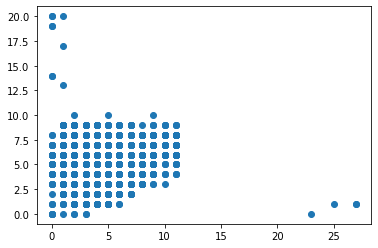

In [110]:
plt.scatter(x=md['NumWebPurchases'], y=md['NumWebVisitsMonth'])

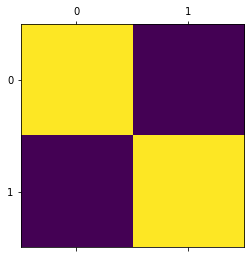

In [111]:
plt.matshow(md[['NumWebPurchases','NumWebVisitsMonth']].corr())
plt.show()

In [112]:
md[['NumWebPurchases','NumWebVisitsMonth']].corr()

NumWebPurchases  NumWebVisitsMonth
NumWebPurchases           1.000000          -0.055846
NumWebVisitsMonth        -0.055846           1.000000

#### What does the average customer look like for this company?

In [113]:
print('Age:', int(md['Age'].mean()))
print('Income:', "$ {:,}".format(int(md['Income'].mean())))
print('Country:', str(md['Country'].mode().sum()))
print('Education:', str(md['Education'].mode().sum()))
print('Marital Status:', str(md['Marital_Status'].mode().sum()))
print('Dependants:', str(md['Dependents'].mode().sum()))
print('Recency:', round(md['Recency'].mean(),2))

Age: 45
Income: $ 52,247
Country: Spain
Education: Graduation
Marital Status: Married
Dependants: 1
Recency: 49.11


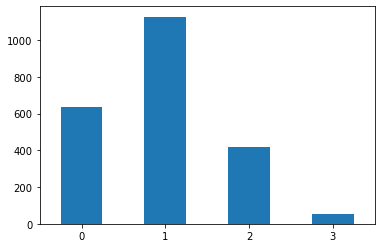

In [114]:
# Customer by dependants
md['Dependents'].value_counts().sort_index().plot(kind='bar', rot=0)

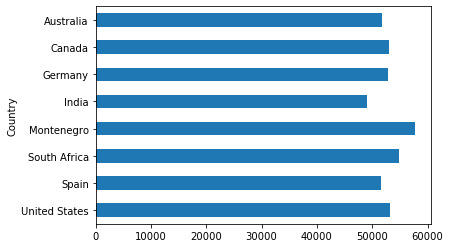

In [115]:
# Customer Income by country
md['Income'].groupby(md['Country']).mean().sort_index(ascending=False).plot(kind='barh', rot=0)

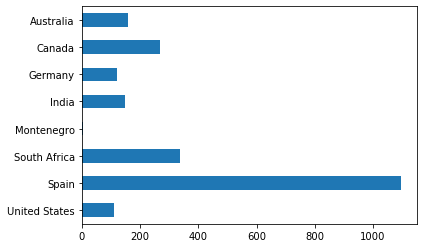

In [116]:
# Customer count by country
md['Country'].value_counts().sort_index(ascending=False).plot(kind='barh', rot=0)

In [117]:
md['Income'].groupby(md['Country']).mean()

Country
Australia        51840.256250
Canada           53044.619403
Germany          52927.625000
India            49038.243243
Montenegro       57680.333333
South Africa     54830.816024
Spain            51565.823744
United States    53200.550459
Name: Income, dtype: float64

In [118]:
md['Country'].value_counts()

Spain            1095
South Africa      337
Canada            268
Australia         160
India             148
Germany           120
United States     109
Montenegro          3
Name: Country, dtype: int64

In [119]:
# Percentage split of education
round(md['Education'].value_counts(normalize=True).mul(100),2)

Graduation    50.31
PhD           21.70
Master        16.52
2n Cycle       9.06
Basic          2.41
Name: Education, dtype: float64

#### Which products are performing best?

In [120]:
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


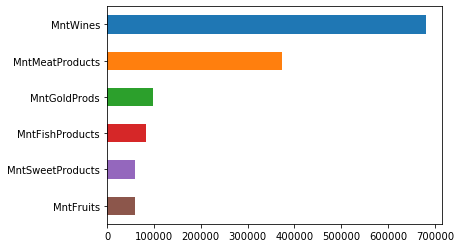

In [121]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'][::-1]
md[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds']].sum().sort_values(ascending=True).plot(kind='barh', rot=0, color=colors)
plt.show()

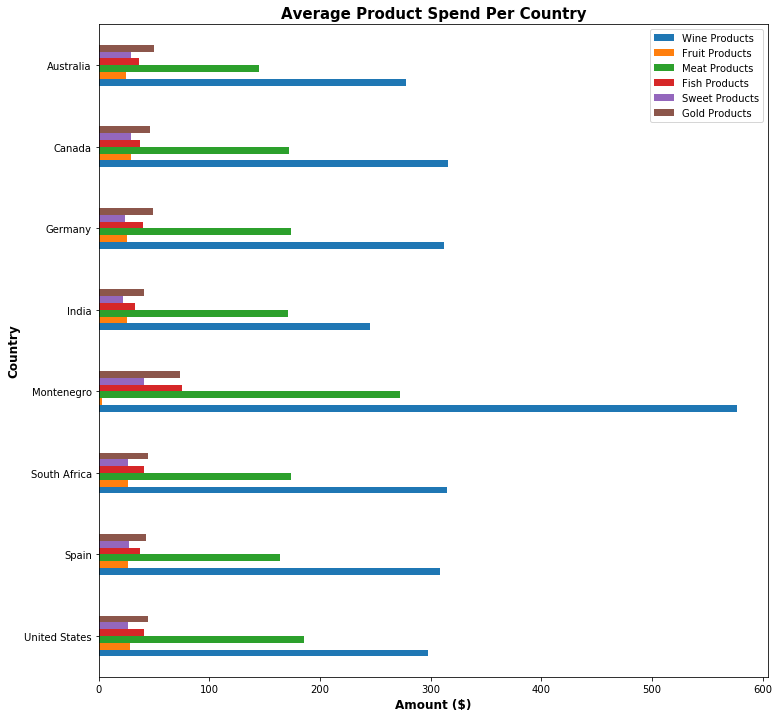

In [122]:
labels = ['Wine Products', 'Fruit Products', 'Meat Products', 'Fish Products', 'Sweet Products', 'Gold Products']
md[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds']].groupby(md['Country']).mean().sort_index(ascending=False).plot(kind='barh', rot=0, legend=labels, figsize=(12,12))
plt.legend(labels=labels)

# Add titles
plt.title('Average Product Spend Per Country', fontweight='bold', fontsize=15)
plt.xlabel('Amount ($)', fontweight='bold', fontsize=12)
plt.ylabel('Country', fontweight='bold', fontsize=12)

plt.show()

We can see the Wine products perform best regardless of country closely followed by Meat products. Gold consistently ranks 3rd in most, if not all countries. Fish ranks 4th just behind Gold for most countries and Fruit and Sweets are tied last place, in Montenegro fruits perform very poorly.

In [123]:
md['Income'].describe()

count      2240.000000
mean      52247.248661
std       25037.797168
min        1730.000000
25%       35538.750000
50%       51741.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

In [124]:
very_low_income = md['Income'].quantile(q=0.125)
low_income = md['Income'].quantile(q=0.25)
middle_income = md['Income'].quantile(q=0.50)
high_income = md['Income'].quantile(q=0.75)
#very_high_income = md['Income'].quantile(q=0.100)

In [125]:
def bucket(v):
    # Splitting income into thresholds depending on percentile info
    if v < very_low_income:
        return 'Very Low'
    if v < low_income:
        return 'Low'
    if v < middle_income:
        return 'High'
    if v < high_income:
        return 'High'
    return 'Very High'

md['Income_Index'] = md['Income'].apply(bucket)

In [126]:
md.to_csv('marketing_data_clean.csv')

In [127]:
# Saving df for Power BI Dashboard
product_sales = pd.DataFrame(md[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds']].sum().sort_values(ascending=True))

In [128]:
product_sales.rename(columns={0: 'Total Sales'}, index={'MntWines':'Wines', 'MntFruits':'Fruits', 'MntMeatProducts':'Meat', 'MntFishProducts':'Fish',
       'MntSweetProducts': 'Sweets', 'MntGoldProds':'Gold'}, inplace=True)

In [129]:
product_sales.to_csv('product_sales.csv', header=True)

In [130]:
product_sales_tran = product_sales.transpose(copy=True)
product_sales_tran.to_csv('product_sales_tran.csv', header=True)

In [131]:
product_sales

Total Sales
Fruits        58917
Sweets        60621
Fish          84057
Gold          98609
Meat         373968
Wines        680816

In [132]:
# Creating variables for filtering tables for each data type
md_cat = md.select_dtypes(include='object')
md_int = md.select_dtypes(exclude='object')

In [133]:
import statsmodels.api as sm;
md_int['intercept'] = 1

lm = sm.OLS(md_int['NumStorePurchases'], md_int[['intercept', 'Income']])
results = lm.fit()
results.summary()

C:\Users\Ags91\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      NumStorePurchases   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     858.3
Date:                Wed, 17 Mar 2021   Prob (F-statistic):          5.65e-160
Time:                        21:48:44   Log-Likelihood:                -5455.2
No. Observations:                2240   AIC:                         1.091e+04
Df Residuals:                    2238   BIC:                         1.093e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.2185      0.135     16.411      0.000       1.953       2.484
Income      6.836e-05   2.33e-06     29.296      0.000    6.38e-05    7.29e-05
==============================================================================
Omnibus:                     1147.979   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            92171.336
Skew:                          -1.534   Prob(JB):                         0.00
Kurtosis:                      34.275   Cond. No.                     1.34e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

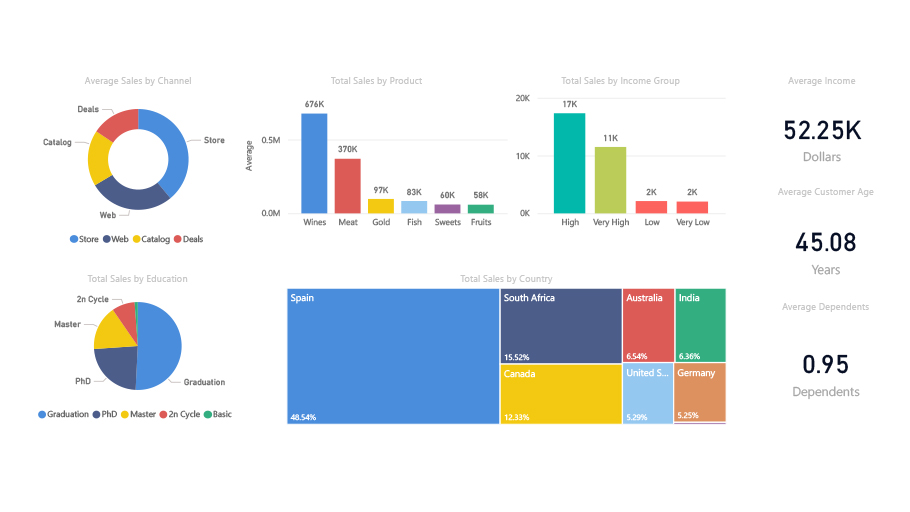

In [134]:
Image.open('images/dashboard.jpg')

In [135]:
# Creating variables for filtering tables for each data type
md_cat = md.select_dtypes(include='object')
md_int = md.select_dtypes(exclude='object')

In [136]:
# Excluding the outlier income value to build analysis dataset
md_int_analysis = md_int[md_int['Income']!=666666]

md_int_analysis

# Removing redundant features
X_md_int = md_int_analysis.drop(['ID','Year_Birth','Dt_Customer','NumStorePurchases','Total_Spent','Total_Purchases', 'WebConversionRate','Income_Purchase_Ratio'], axis=1)

# Use store purchases for model prediction
y= md_int_analysis[['NumStorePurchases']].iloc[:,-1:].values.ravel()